### Note
It works well in Chr 2, 3, 6, 7

In [64]:
%%bash

HIC_PATH="/media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic"
OUTPUT_PATH="/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_1Mb"
JUICER_TOOLS_PATH="/home/jordan990301/PCA_Experiments/juicer/juicer_tools.jar"

java -jar $JUICER_TOOLS_PATH pearsons KR $HIC_PATH 2 BP 1000000 $OUTPUT_PATH/pearson_matrix.txt -p
java -jar $JUICER_TOOLS_PATH eigenvector KR $HIC_PATH 2 BP 1000000 $OUTPUT_PATH/eigenvector.txt -p

WARN [2023-12-26T22:10:45,492]  [Globals.java:138] [main]  Development mode is enabled
Reading file: /media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic
WARN [2023-12-26T22:10:46,567]  [Globals.java:138] [main]  Development mode is enabled


In [65]:
import numpy as np
import pandas as pd

In [66]:
hic_path = "/media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic"
output_path = "/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_1Mb"
chrom_name_x = "2"
chrom_name_y = "2"
chrom_type = "BP"
norm = "KR"
resolution = 1000000

In [67]:
pearson_df = pd.read_table(f"/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_1Mb/pearson_matrix.txt", header=None, sep=" ")
pearson_df.pop(pearson_df.columns[-1])

pearson_df = pearson_df.dropna(axis=0, how="all").reset_index(drop=True)
pearson_df = pearson_df.dropna(axis=1, how="all")

numpy_pearson_df = pearson_df.values
pearson_df = pd.DataFrame(numpy_pearson_df)

np.savetxt(f'{output_path}/Pearson_Entry1_Dropna.txt', pearson_df[0].values, fmt='%1.4e')

In [68]:
EV1_df = pd.read_table(f"/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_1Mb/eigenvector.txt", header=None, sep=" ")

EV1_df = EV1_df.dropna(axis=0, how="all").reset_index(drop=True)
EV1_df = EV1_df.dropna(axis=1, how="all")

np.savetxt(f'{output_path}/EV1_Dropna.txt', EV1_df[0].values, fmt='%1.4e')

numpy_pearson_df = EV1_df.values
EV1_df = pd.DataFrame(numpy_pearson_df)

In [69]:
Pearson_Entry1_Pos = pearson_df[0] > 0
EV1_Pos = EV1_df > 0

Pearson_Entry1_Pos = Pearson_Entry1_Pos.to_numpy()
EV1_Pos = EV1_Pos.to_numpy()

Difference_Count = 0
for i in range(Pearson_Entry1_Pos.shape[0]):
    if(Pearson_Entry1_Pos[i] != EV1_Pos[i]):
        Difference_Count += 1


print("Pearson_Entry1_Pos -> Entry Num:")
print(Pearson_Entry1_Pos.shape[0])

print("EV1_Pos -> Entry Num:")
print(EV1_Pos.shape[0])

print("Difference_Count:")
print(Difference_Count)

Pearson_Entry1_Pos -> Entry Num:
242
EV1_Pos -> Entry Num:
242
Difference_Count:
189


#### Visualization

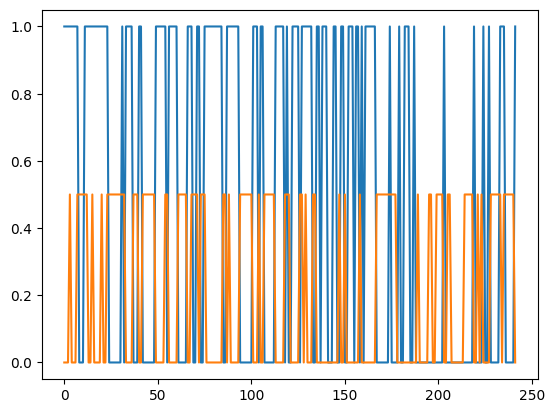

In [70]:
from matplotlib import pyplot as plt

Pearson_Entry1_Viz = []

for i in Pearson_Entry1_Pos:
    if i:
        Pearson_Entry1_Viz.append(1)
    else:
        Pearson_Entry1_Viz.append(0)

plt.plot(Pearson_Entry1_Viz)

EV1_Viz = []

for i in EV1_Pos:
    if i:
        EV1_Viz.append(0.5)
    else:
        EV1_Viz.append(0)

plt.plot(EV1_Viz)